### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\julia\Hate Crime'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'new_hate_crime_wrangled.csv'))

In [5]:
df.shape

(180293, 11)

In [6]:
df.head()

,Unnamed: 0,incident_year,state_abbr,state_name,region_name,offender_count,offender_race,victim_count,offense_type,total_individual_victims,prejudice
0,0,1991,AR,Arkansas,South,1,White,1,Intimidation,1,Anti-Black or African American
1,1,1991,AR,Arkansas,South,1,Black or African American,1,Simple Assault,1,Anti-White
2,2,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1,Anti-Black or African American
3,3,1991,AR,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1,Anti-White
4,4,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1,Anti-White


In [7]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'state_abbr', 'state_name', 'region_name', 'offender_race', 'offense_type', 'prejudice'],axis = 1)

In [8]:
df.head()

,incident_year,offender_count,victim_count,total_individual_victims
0,1991,1,1,1
1,1991,1,1,1
2,1991,1,1,1
3,1991,1,2,1
4,1991,1,1,1


### 2. Elbow Technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

In [11]:
score

[-11373633.991335621,
 -3543270.102469892,
 -2008107.6763035771,
 -1433347.3922715553,
 -1197458.8438336856,
 -1056165.5842680742,
 -925260.6930181026,
 -831701.4685316642,
 -744394.4152068994]

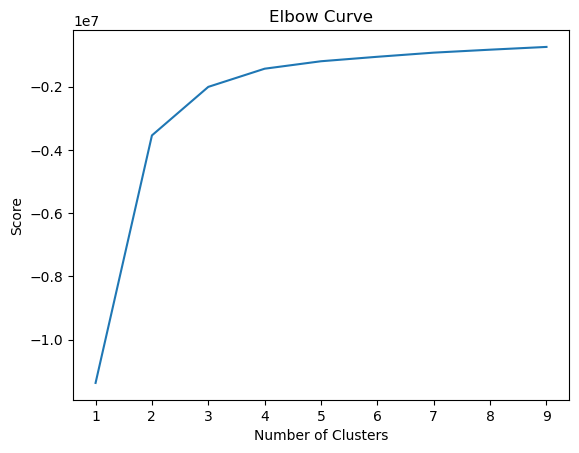

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis and a small jump from three to four, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. K-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init = 1) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4, n_init=1)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

In [16]:
df.head()

,incident_year,offender_count,victim_count,total_individual_victims,clusters
0,1991,1,1,1,2
1,1991,1,1,1,2
2,1991,1,1,1,2
3,1991,1,2,1,2
4,1991,1,1,1,2


In [17]:
df['clusters'].value_counts()

0    48505
3    47823
1    45025
2    38940
Name: clusters, dtype: int64

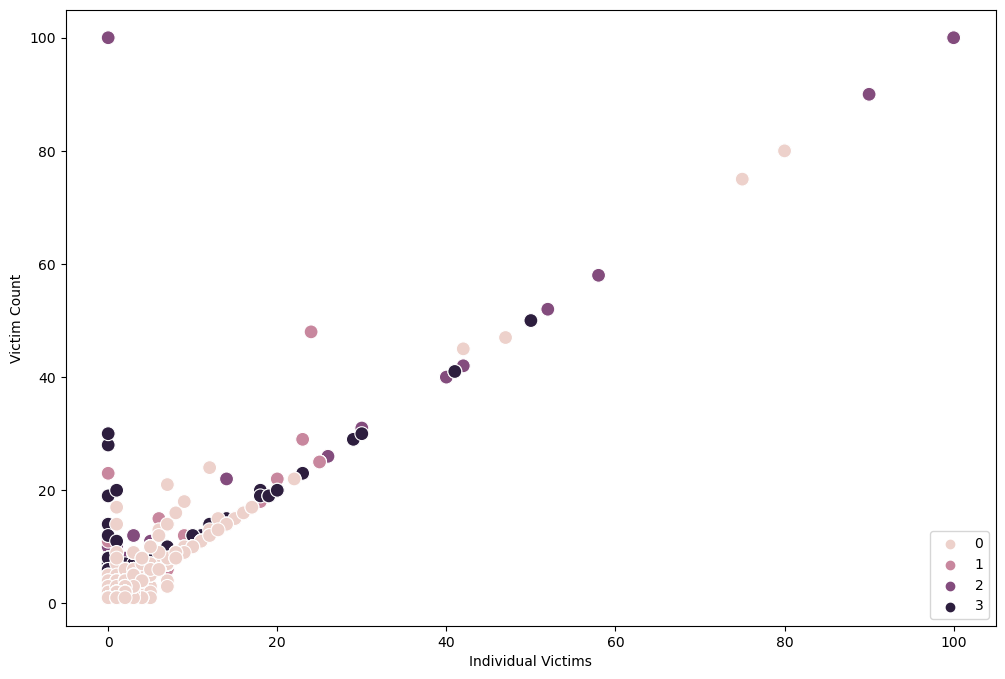

In [18]:
# Plot the clusters for the "Individual Victims" and "Victim Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_individual_victims'], y=df['victim_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Individual Victims') # Label x-axis.
plt.ylabel('Victim Count') # Label y-axis.
plt.show()

#### In this plot, the plot shows a positive relationship between the individual victim and victim count. This makes sense as it confirms our hypothesis that as the count of individual victims increase the victim count increases.

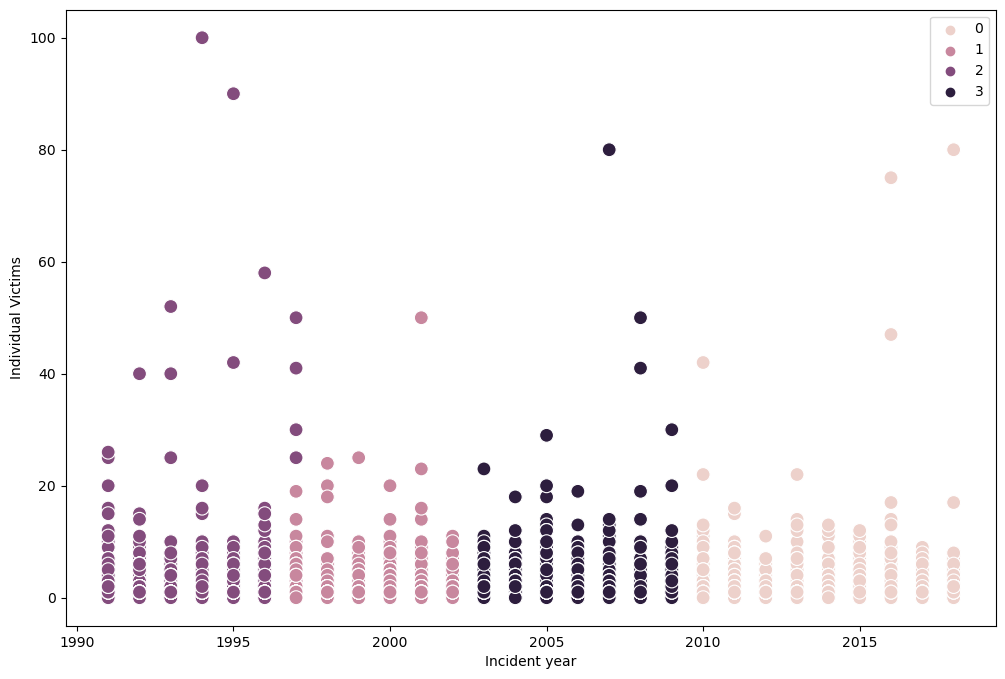

In [19]:
# Plot the clusters for the "Incident year" and "Individual Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['incident_year'], y=df['total_individual_victims'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Incident year') 
plt.ylabel('Individual Victims') 
plt.show()

#### This plot also makes sense as it is giving a frequency of victims for each year. 

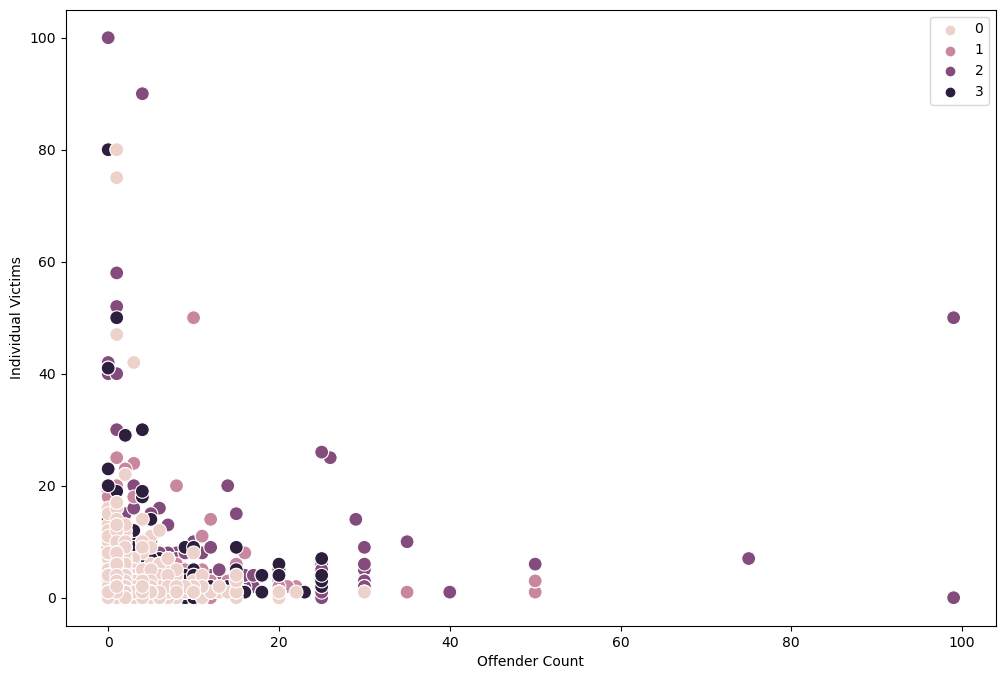

In [20]:
# Plot the clusters for the "Offender Count" and "Individual Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['offender_count'], y=df['total_individual_victims'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Offender Count') 
plt.ylabel('Individual Victims') 
plt.show()

#### This plot shows no relationship between the offender count and the individual victims. This makes sense as there is no correlation between the count of offender and victim.

In [21]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [22]:
df.groupby('clusters').agg({'offender_count':['mean', 'median'], 
                         'victim_count':['mean', 'median'], 
                         'total_individual_victims':['mean', 'median']})

offender_count        victim_count        total_individual_victims  \
                   mean median         mean median                     mean   
clusters                                                                      
0              0.939697    1.0     1.235089    1.0                 1.039398   
1              0.985675    1.0     1.233715    1.0                 0.957290   
2              1.122188    1.0     1.263534    1.0                 1.046482   
3              0.952011    1.0     1.243209    1.0                 0.923677   

                 
         median  
clusters         
0           1.0  
1           1.0  
2           1.0  
3           1.0

#### The grouping of information, in this case, showed that there is a median of at least 1 victim for an offender. 